# Finance Data Project 

In this data project we will focus on exploratory data analysis of **LIVE** stock prices and answering key questions about investment options.
____
We'll focus on bank stocks and see how they are progressing from 2018 to date. The interesting tipping point would be to see how the stocks fluctuate during the **COVID outbreak** and then begins to resume normalcy. It is also an indication for regular stocks-followers about how the major banks are performing and the comparitive study, as also in which bank would investing be most profitable, in which bank does investing carry least risk and so on.

We'll try to find answers to all these questions in this project

## Get the Data

**We'll need use pandas-datareader to directly read data from Google finance.** This ensures that whenevr we run this notebook, the stock prices will get updated on up until the day before!
_____
### The Imports

In [7]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

**We need to get data using pandas datareader. We will get stock information for the following banks:**
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**We get the stock data from Jan 1st 2018 to Jun 12th 2020 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.


### WARNING: MAKE SURE TO CHECK THE LINK-https://pandas-datareader.readthedocs.io/en/latest/remote_data.html FOR THE LATEST WORKING API. "stooq" MAY NOT ALWAYS WORK. 

In [9]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [14]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [18]:
#We combine these panel objects into a DataFrame and frab a look at how it looks
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)
df.head()

Attributes  Close                                        High          \
Symbols       BAC      C      GS     JPM     MS    WFC    BAC       C   
Date                                                                    
2020-06-12  24.78  52.25  201.78   99.87  46.28  27.97  25.05  52.450   
2020-06-11  23.93  48.39  194.13   97.21  44.57  26.79  25.69  53.515   
2020-06-10  26.60  55.86  213.52  106.06  48.69  29.71  28.10  59.140   
2020-06-09  28.22  59.50  218.10  110.54  50.40  32.63  28.54  60.200   
2020-06-08  28.54  61.24  220.81  113.45  50.15  33.32  28.90  61.330   

Attributes                     ...    Open                           Volume  \
Symbols           GS      JPM  ...      GS     JPM     MS    WFC        BAC   
Date                           ...                                            
2020-06-12  202.9400  101.130  ...  200.62  100.71  46.76  28.00   73729708   
2020-06-11  206.9000  101.580  ...  204.70  100.03  46.13  27.20  149875451   
2020-06-10  219.8499  110.505  ...  217.39  110.46  50.03  32.30   90415306   
2020-06-09  220.0200  111.630  ...  215.74  110.65  48.72  32.44   77773379   
2020-06-08  222.2646  114.190  ...  220.02  113.41  50.52  32.90   79598450   

Attributes                                                   
Symbols            C       GS       JPM        MS       WFC  
Date                                                         
2020-06-12  39040017  3380817  24856764  14093076  51301222  
2020-06-11  62098621  4923410  36259224  17961917  75621263  
2020-06-10  36743698  3091188  24913328  14770858  82089966  
2020-06-09  30422854  2478365  17031144  15090449  51480394  
2020-06-08  32587123  3260307  24881791  12150265  69051349  

[5 rows x 30 columns]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [20]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. **

In [21]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels:**

In [22]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [23]:
bank_stocks.head()

Bank Ticker    BAC                                      C                 \
Stock Info    Open   High    Low  Close     Volume   Open    High    Low   
Date                                                                       
2020-06-12   25.03  25.05  24.04  24.78   73729708  51.40  52.450  49.80   
2020-06-11   24.98  25.69  23.68  23.93  149875451  51.67  53.515  48.20   
2020-06-10   27.97  28.10  26.51  26.60   90415306  58.90  59.140  55.86   
2020-06-09   27.72  28.54  27.55  28.22   77773379  59.00  60.200  57.65   
2020-06-08   28.59  28.90  28.14  28.54   79598450  60.66  61.330  59.77   

Bank Ticker                   ...     MS                                   \
Stock Info   Close    Volume  ...   Open    High     Low  Close    Volume   
Date                          ...                                           
2020-06-12   52.25  39040017  ...  46.76  46.945  45.120  46.28  14093076   
2020-06-11   48.39  62098621  ...  46.13  47.200  44.440  44.57  17961917   
2020-06-10   55.86  36743698  ...  50.03  50.500  48.605  48.69  14770858   
2020-06-09   59.50  30422854  ...  48.72  50.685  48.570  50.40  15090449   
2020-06-08   61.24  32587123  ...  50.52  50.680  49.380  50.15  12150265   

Bank Ticker    WFC                                   
Stock Info    Open    High     Low  Close    Volume  
Date                                                 
2020-06-12   28.00  28.230  27.350  27.97  51301222  
2020-06-11   27.20  28.425  26.700  26.79  75621263  
2020-06-10   32.30  32.330  29.650  29.71  82089966  
2020-06-09   32.44  33.080  31.510  32.63  51480394  
2020-06-08   32.90  33.430  32.265  33.32  69051349  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit!

** What is the max and min Close price for each bank's stock throughout the time period?**

In [159]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max() #Goldman Sachs

Bank Ticker
BAC     35.169
C       80.515
GS     261.710
JPM    138.750
MS      56.637
WFC     59.723
dtype: float64

In [160]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').min() #Also Goldman Sachs


Bank Ticker
BAC     10.248
C       31.986
GS     130.620
JPM     47.300
MS      19.557
WFC     22.530
dtype: float64

**We create a new empty DataFrame called returns which will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [28]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [35]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2020-06-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-11,-0.034302,-0.073876,-0.037913,-0.026635,-0.036949,-0.042188
2020-06-10,0.111575,0.154371,0.099882,0.091040,0.092439,0.108996
2020-06-09,0.060902,0.065163,0.021450,0.042240,0.035120,0.098283
2020-06-08,0.011339,0.029244,0.012425,0.026325,-0.004960,0.021146


** Create a pairplot using seaborn of the returns dataframe to check if stock stands out**

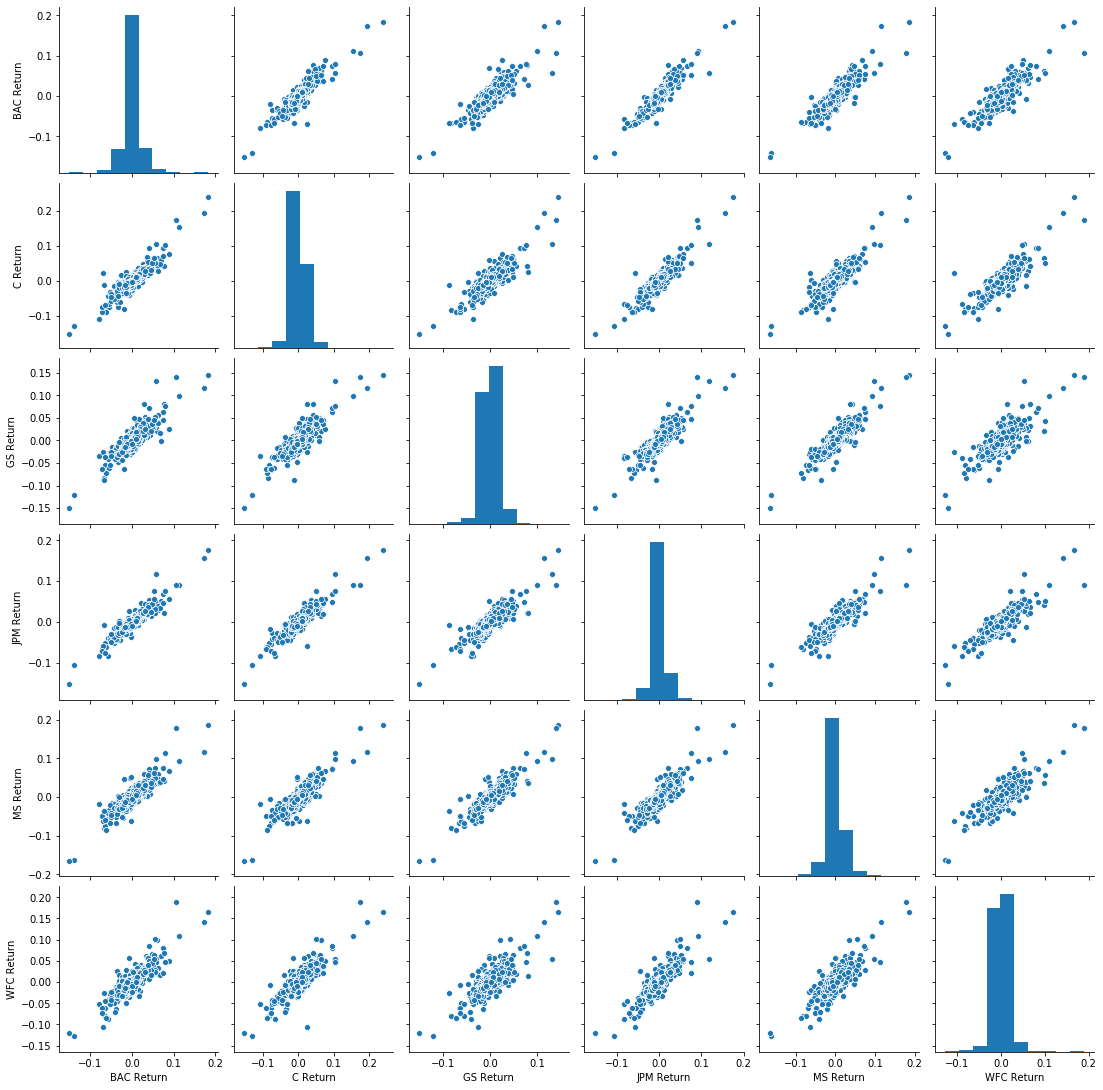

In [36]:
import seaborn as sns
sns.pairplot(returns[1:])

**All relative plots from 2018-2020 look grossly normal. This tells us that whatever ups and downs were seen in the market were seen across all banks**

** Using this returns DataFrame, we figure out on what dates each bank stock had the best and worst single day returns.**

In [161]:
# Worst Drop
returns.idxmin()

BAC Return   2020-03-12
C Return     2020-03-12
GS Return    2020-03-12
JPM Return   2020-03-12
MS Return    2020-03-12
WFC Return   2020-03-23
dtype: datetime64[ns]

**We see that 5 out of 6 banks had the worst day on 12-03-2020. What was so special about this day?**

**This was the day the COVID-19 was reported as an epidemic and a major scare had spread especially in the US. More info can be found in this CNBC news article: https://www.cnbc.com/2020/03/12/stock-market-today-live.html**


In [38]:
# Best Single Day Gain- https://www.cnbc.com/2020/03/13/stock-market-today-live.html
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-11
dtype: datetime64[ns]

**We again see that 5 out of 6 banks had the best day on 13-03-2020. What was so special about this day?**

**There was nothing jolly about this day; the previous day dip was so large that even a shred of returning to normalcy seems like the best gain. More info can be found in this CNBC news article: https://www.cnbc.com/2020/03/13/stock-market-today-live.html**

We take a look at the standard deviation of the returns, to determine which stock would be the riskiest over the entire time period?

In [100]:
returns.std()

BAC Return    0.021497
C Return      0.023358
GS Return     0.019656
JPM Return    0.018679
MS Return     0.021821
WFC Return    0.020059
dtype: float64

### Citigroup would be the riskiest if we consider the entire 2018-2020 (albeit by a small margin)

Which would be classified the riskiest for the year 2018? (i.e before Corona was present)

In [110]:
returns.loc['2018'].std()

BAC Return    0.015646
C Return      0.015319
GS Return     0.016481
JPM Return    0.014036
MS Return     0.017328
WFC Return    0.015098
dtype: float64

### Very similar risk profiles, but Morgan Stanley or BofA would be the riskiest to invest in 2018

What about the riskiest for the year 2020?

In [109]:
returns.loc['2020'].std()

BAC Return    0.049342
C Return      0.059324
GS Return     0.044127
JPM Return    0.045916
MS Return     0.049242
WFC Return    0.051140
dtype: float64

### In 2020 the riskiest would definitely be Citigroup! by a large margin

** We create a distplot of the 2018 returns for Morgan Stanley, to visualize the count of positive and negative returns**

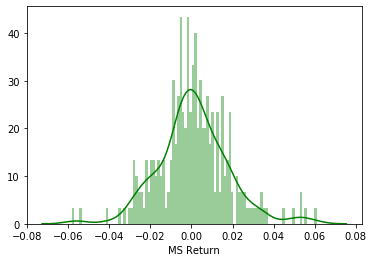

In [102]:
sns.distplot(returns.loc['2018']['MS Return'],color='green',bins=100)

**  We also create a distplot using seaborn of the 2020 returns for CitiGroup to visualize the count of positive and negative returns **

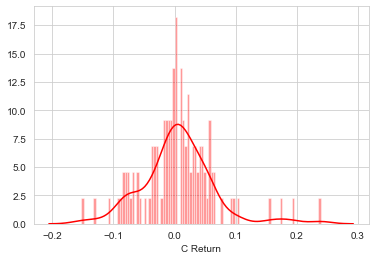

In [112]:
sns.distplot(returns.loc['2020']['C Return'],color='red',bins=100)

____
# Some More Visualization

A lot of this part of the project will focus on visualizations and gaining insights from them.

### Imports

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time.**

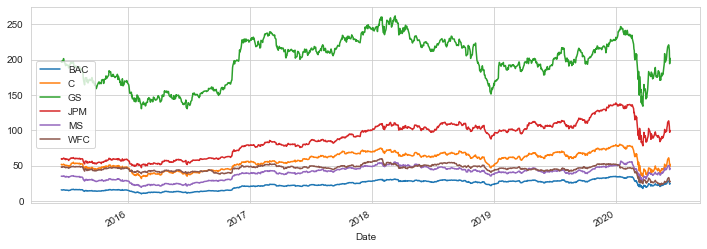

In [113]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [162]:
# An interactive plot using plotly.
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot(title='Hover over the plot to compare values')

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2020. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2020**

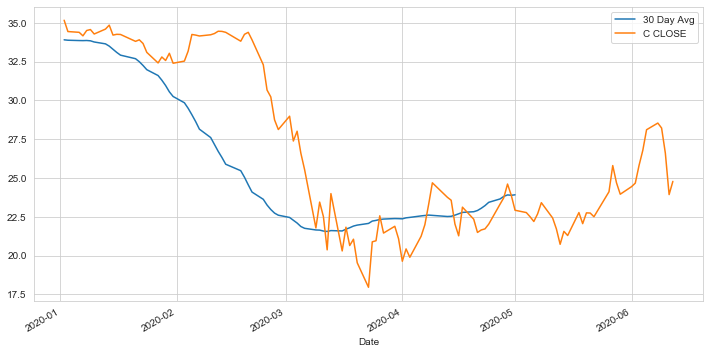

In [121]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2020'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2020'].plot(label='C CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

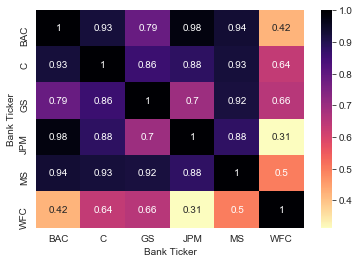

In [126]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), annot=True, cmap='magma_r')

**We see that WFC has the weakest corelation with the other bank. This means that the closing values of other banks and WFC are not very similar. This is true since WFC has consistently held better closing values as can be seen in the line graph above**

** We use a clustermap to cluster the correlations together:**

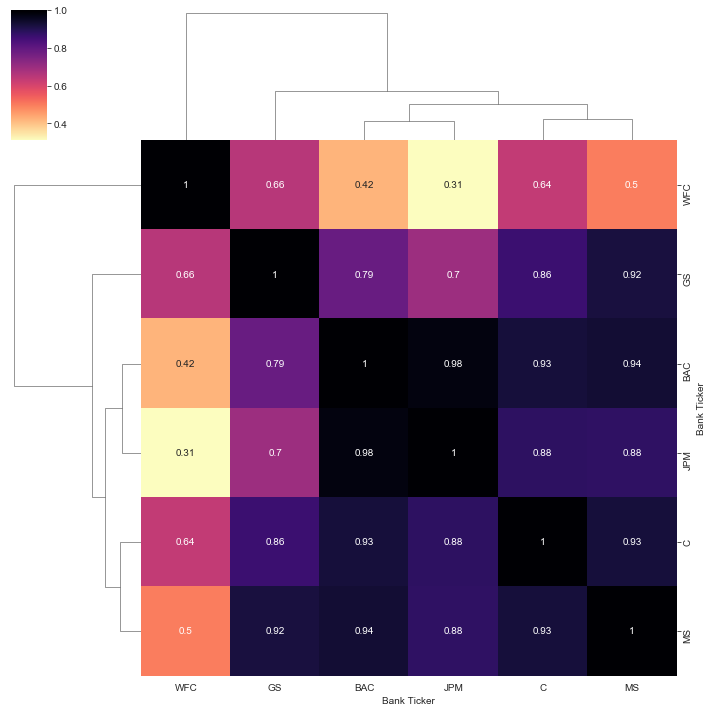

In [127]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, cmap='magma_r')

In [164]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu', title="Hover over the heatmap to view interactive corelation values")

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

** We use .iplot(kind='candle) to create a candle plot of Bank of America's stock in 2020.**

In [165]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2020'].iplot(kind='candle', title="Hover over the candleplot to view interactive open, close values")

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [151]:
MS['Close'].loc['2020'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

** Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015. **

In [154]:
BAC['Close'].loc['2020'].ta_plot(study='boll',title='Bollinger Band Plot')